# RetroTide - Extras (1)

Vincent Blay, Tyler W. H. Backman - Jan 2022

In this notebook we describe the capabilities of RetroTide to 1) generate random polyketides and 2) classify molecules as PKSable or not.

In [1]:
import numpy as np
import os, sys, glob, re, pickle
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdFMCS, CHI_UNSPECIFIED, BondType, BondDir, AddHs
from rdkit.Chem.Draw import IPythonConsole

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from retrotide import *
import retrotide
retrotide.__version__

'0.1'

## Enumerating random polyketides

In [5]:
random_PK_library_maker(5, random_state=42)

5 unique polyketides generated.


['C=CCC1=C[C@@H](CCCCCC)CC(=C[C@@H](CC=C)CC=C[C@H](CCCC)C(=O)c2ccc[nH]2)OC(=O)[C@H](CC=C)C(=O)[C@H](C(C)C)[C@@H]1O',
 'C=CC[C@H](C=C(C)C(=O)[C@H](OC)C(=O)[C@@H](C=C(CC)C(=O)O)CC=C)CC(=C[C@H](CC(C)C)C(C)C)CCCCc1c[nH]c(Cl)c1Cl',
 'CCCCC(=C[C@@H](C(=O)[C@@H](C(=O)[C@H](C(=O)c1csc(C)n1)C(C)C)C(C)C)C(C)C)C=C(OC)[C@@H](O)CC(=O)[C@H](C=C(CCCC)C(=O)O)C(C)C',
 'CCCCC(C=CC[C@H](CCCCc1c[nH]c(Cl)c1Cl)C(=O)[C@@H](O)C=C(C(C)C)[C@H]1OC(=O)[C@@H]1CCCCc1c[nH]c(Cl)c1Cl)=CC(=CC(=CCc1ccccc1)OC)C(C)C',
 'CCCCCC[C@@H](C(=O)[C@H](CCCCc1c[nH]c(Cl)c1Cl)C(=O)[C@@H](O)C[C@H](C)[C@H](O)[C@H](CCCC)[C@H](O)C=C[C@H](CCCCc1c[nH]c(Cl)c1Cl)C(=O)CC(C)C)[C@H]1OC(=O)[C@@H]1CCCCc1c[nH]c(Cl)c1Cl']

In [6]:
smiles_lib, modules_lib = random_PK_library_maker(100, max_modules=7, return_modules=True, random_state=42)

100 unique polyketides generated.


In [7]:
modules_lib

[[["AT{'substrate': 'mthz'}", 'loading: True'],
  ["AT{'substrate': 'butmal'}", "KR{'type': 'C1'}", 'loading: False'],
  ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'loading: False'],
  ["AT{'substrate': 'isobutmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'],
  ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'],
  ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False'],
  ["AT{'substrate': 'mxmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'],
  ["AT{'substrate': 'butmal'}", 'loading: False']],
 [["AT{'substrate': 'cin'}", 'loading: True'],
  ["AT{'substrate': 'isobutmal'}", "KR{'type': 'C1'}", 'loading: False'],
  ["AT{'substrate': 'allylmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'],
  ["AT{'substrate': 'allylmal'}", 'loading: False'],
  ["AT{'substrate': 'mxmal'}", 'loading: False'],
  ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'],
  ["AT{'substrate': 'isobutmal'}", "KR{'type': 'B1'}", 'DH{}', '

In [8]:
PKSable_library = random_PK_library_maker(10000, max_modules=10, random_state=42)

5000
10000
10000 unique polyketides generated.


In [9]:
#pd.DataFrame(PKSable_library).to_csv('./data/PKSable_library.csv', header=False)

##  PKSable Fragment-based classifier

In [10]:
cutoff = 0.98

### PKSability of polyketides

In [11]:
df_pk = pd.read_csv('./data/PKSable_library.csv', header=None)
pk_lib = list(df_pk.iloc[:,1])

In [12]:
pred_score_pk = PKSable_fragment_classifier(pk_lib)

5000
10000


In [13]:
pred_class_pk = (pred_score_pk >= cutoff) * 1

In [14]:
len(pred_class_pk)

10000

In [15]:
sum(pred_class_pk)

10000

In [16]:
np.mean(pred_score_pk)

1.0

### PKSability of DrugBank

Let us prepare the test library:

In [17]:
df_db = pd.read_csv('./data/DrugBank_clean.csv')
db_lib = list(df_db.SMILES)

In [18]:
pred_score_db = PKSable_fragment_classifier(db_lib)

5000
10000


In [19]:
pred_class_db = (pred_score_db >= cutoff) * 1

In [20]:
len(pred_class_db)

11150

In [21]:
sum(pred_class_db)

54

In [22]:
np.mean(pred_score_db)

0.43135481677610543

### PKSability of GDB-13 database (random sample of 1 M molecules)

In [23]:
gdb_lib = pd.read_csv('./data/gdb13.1M.freq.ll.smi', sep='\t', header=None, usecols=[0])
gdb_lib = list(gdb_lib.iloc[:,0])

In [24]:
pred_score_gdb = PKSable_fragment_classifier(gdb_lib)

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
73000

In [25]:
pred_class_gdb = (pred_score_gdb >= cutoff) * 1

In [26]:
len(pred_class_gdb)

1000000

In [27]:
sum(pred_class_gdb)

71

In [28]:
np.mean(pred_score_gdb)

0.37844512512602746

### PKSability of food natural products

A [work in bioRxiv](https://www.biorxiv.org/content/10.1101/2020.11.06.371112v2) has predicted that a variety of natural products present in food may have medicinal activity against known drug targets. In this section, we evaluate which of such compounds may be PKSable using our fragment-based classifier.

In [29]:
df_food = pd.read_csv('./data/food_compounds_clean.csv')

In [30]:
food_lib = list(df_food['SMILES'])

In [31]:
pred_score_food = PKSable_fragment_classifier(food_lib)

5000
10000


In [32]:
pred_class_food = (pred_score_food >= cutoff) * 1

In [33]:
len(pred_class_food)

11780

In [34]:
sum(pred_class_food)

405

In [35]:
np.mean(pred_score_food)

0.4827181202118736

### PKSability of MIBiG secondary metabolites database

In [36]:
mibig_df = pd.read_csv('./data/mibig_compounds.csv')

In [37]:
mibig_lib = list(mibig_df['SMILES'])
pred_score_mibig = PKSable_fragment_classifier(mibig_lib)
pred_class_mibig = (pred_score_mibig >= cutoff) * 1

In [38]:
len(mibig_df)

1925

In [39]:
sum(pred_class_mibig)

4

In [40]:
np.mean(pred_score_mibig)

0.4754641538833171

### Plots

In [50]:
df = pd.DataFrame(columns=['SMILES','Predicted_score', 'Dataset'])

a = pd.DataFrame(zip(PKSable_library, pred_score_pk), columns=['SMILES','Predicted_score'])
a['Dataset'] = "Polyketides"
df = pd.concat([df,a], ignore_index=True)

a = pd.DataFrame(zip(gdb_lib, pred_score_gdb), columns=['SMILES','Predicted_score'])
a['Dataset'] = "GDB-13"
df = pd.concat([df,a], ignore_index=True)

a = pd.DataFrame(zip(db_lib, pred_score_db), columns=['SMILES','Predicted_score'])
a['Dataset'] = "DrugBank"
df = pd.concat([df,a], ignore_index=True)

a = pd.DataFrame(zip(food_lib, pred_score_food), columns=['SMILES','Predicted_score'])
a['Dataset'] = "Food compounds"
df = pd.concat([df,a], ignore_index=True)

a = pd.DataFrame(zip(mibig_lib, pred_score_mibig), columns=['SMILES','Predicted_score'])
a['Dataset'] = "MIBiG"
df = pd.concat([df,a], ignore_index=True)

df

,SMILES,Predicted_score,Dataset
0,C=CCC(=CC(=CC(=CC(=C[C@H](CC)OC)CCCC)OC)CCCCCC...,1.0,Polyketides
1,C=CCC(=CC(=CC(=CC(=C[C@H](CCC)CCCC)CCCCc1c[nH]...,1.0,Polyketides
2,C=CCC(=CC(=CC(=CC(O)C(=O)c1ccccc1)OC)OC)C[C@H]...,1.0,Polyketides
3,C=CCC(=CC(=CC(=C[C@@H](CC)Cc1ccc[nH]1)CC)C(C)C...,1.0,Polyketides
4,C=CCC(=CC(=CC(=C[C@@H](CC=C)C(=O)[C@H](CCCCc1c...,1.0,Polyketides
...,...,...,...
1034850,CC(C1C(C2=C(C(=C3C(=O)C=C(C4=C5C(=CC(=O)C6=C(C...,0.459459,MIBiG
1034851,COC1=C(C2=CC3=C(C(=C2C(=C1)O)O)C(=O)O[C@@H](C3...,0.510204,MIBiG
1034852,NCCC(O)CCCCCCCC(N)CCCCCCCC(N)CCCCCCCC(N)CCCCCC...,0.6,MIBiG
1034853,O=C1C=C(NC(=O)CCCCC)N2CCCC12,0.625,MIBiG


In [51]:
df.to_csv("./data/results_PKSability.csv", index=False)

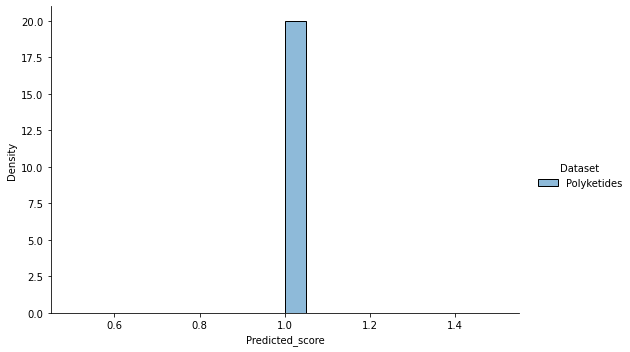

In [52]:
chart = sns.displot(data=df[df["Dataset"]=="Polyketides"], x='Predicted_score', hue='Dataset', kind="hist", 
                    stat="density",bins=20, height=5, aspect=1.5)

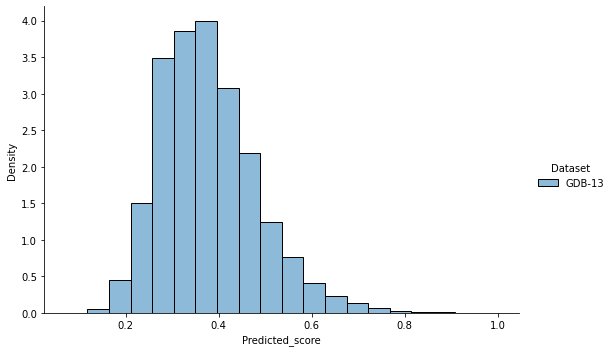

In [53]:
chart = sns.displot(data=df[df["Dataset"]=="GDB-13"], x='Predicted_score', hue='Dataset', kind="hist", 
                    stat="density",bins=20, height=5, aspect=1.5)

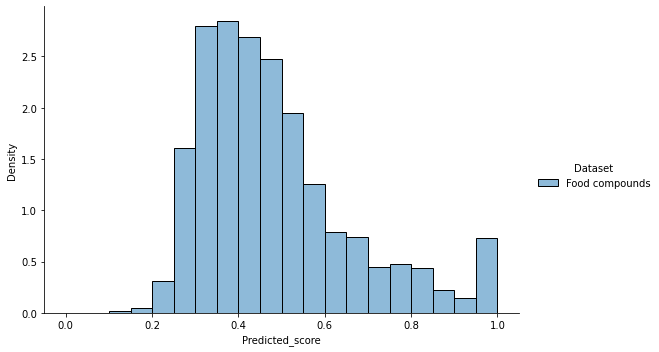

In [54]:
chart = sns.displot(data=df[df["Dataset"]=="Food compounds"], x='Predicted_score', hue='Dataset', kind="hist", 
                    stat="density",bins=20, height=5, aspect=1.5)

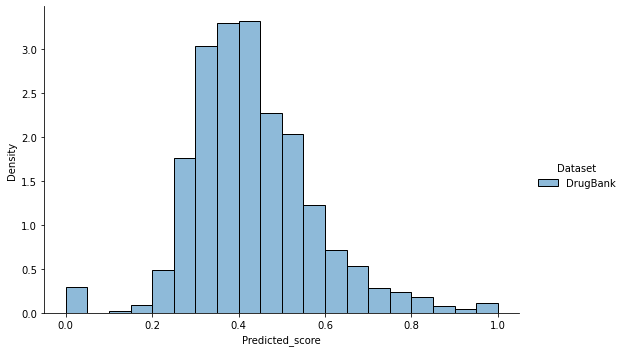

In [55]:
chart = sns.displot(data=df[df["Dataset"]=="DrugBank"], x='Predicted_score', hue='Dataset', kind="hist", 
                    stat="density",bins=20, height=5, aspect=1.5)

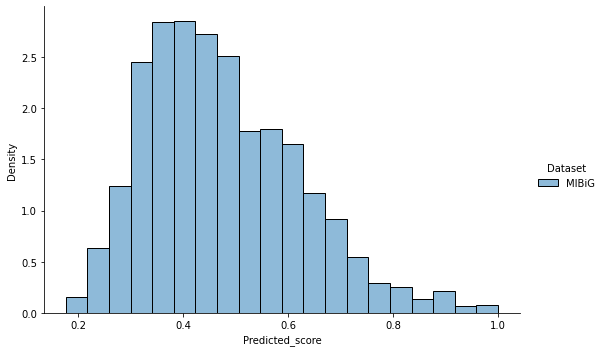

In [56]:
chart = sns.displot(data=df[df["Dataset"]=="MIBiG"], x='Predicted_score', hue='Dataset', kind="hist", 
                    stat="density",bins=20, height=5, aspect=1.5)